In [1]:
import numpy as np  # noqa
import matplotlib.pyplot as plt  # noqa

### Comparison of 10-armed bandit problem between ε-greedy and greedy methods

Actions estimates are calculated using the sample-average method.


In [3]:
def sample_action(true_value):
    return np.random.normal(true_value, 1)


def executor(runs=2000, time_steps=1000, epsilon=0.1):
    rewards_agg = []
    for i in range(runs):
        rewards_history = []

        # Define true action values
        qstar = np.random.normal(0, 1, size=10)

        # Action value estimates are all initially 0
        qa = np.zeros(10)
        action_counts = np.zeros(10)

        for n in range(time_steps):
            if np.random.rand() > epsilon:
                # Choose action greedily
                action = np.argmax(qa)
            else:
                action = np.random.choice(np.arange(10))

            # Sample action_value
            reward = sample_action(qstar[action])
            rewards_history.append(reward)

            # Update action count
            action_counts[action] += 1
            # Update action value estimate
            qa[action] = qa[action] + 1 / action_counts[action] * (reward - qa[action])

        rewards_agg.append(rewards_history)

    stacked = np.vstack(rewards_agg)
    averaged_array = np.mean(stacked, axis=0)
    return averaged_array

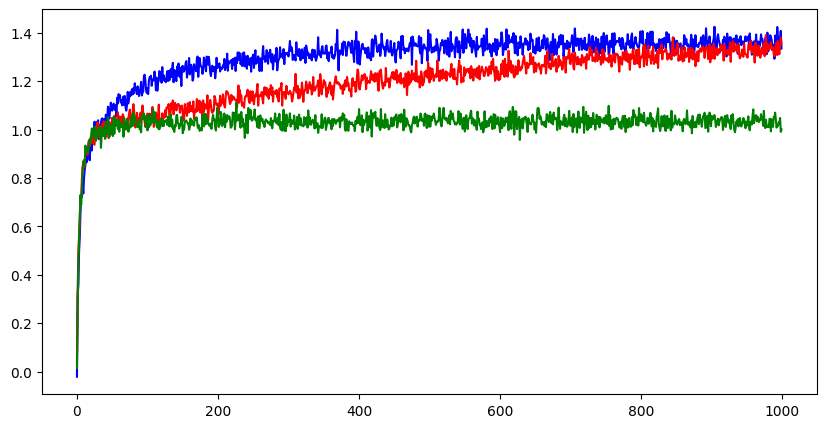

In [ ]:
# Plot different runs of the experiment in different colors on the same plot
results = executor(epsilon=0.1)
plt.plot(results, color="blue")

results = executor(epsilon=0.01)
plt.plot(results, color="red")

results = executor(epsilon=0)
plt.plot(results, color="green")

# Increase width of plot
plt.gcf().set_size_inches(10, 5)

### Exercise 2.5

Comparison of non-stationary 10-armed bandit problem between sample-average and constant step-size parameter methods


In [4]:
def sample_action(true_value):
    return np.random.normal(true_value, 1)


def update_true_action_values(true_values):
    return [value + np.random.normal(0, 0.01) for value in true_values]


# Define number of runs
def executor(runs=2000, time_steps=1000, epsilon=0.1, alpha=0.1, constant_step=False):
    rewards_agg = []
    for i in range(runs):
        rewards_history = []

        # Define true action values
        qstar = np.random.normal(0, 1, size=10)

        # Action value estimates are all initially 0
        qa = np.zeros(10)
        action_counts = np.zeros(10)

        for n in range(1, time_steps + 1):
            if np.random.rand() > epsilon:
                # Choose action greedily
                action = np.argmax(qa)
            else:
                action = np.random.choice(np.arange(10))

            # Sample action_value
            reward = sample_action(qstar[action])
            rewards_history.append(reward)

            # Update action count
            action_counts[action] += 1

            # Update action value estimate
            if constant_step:
                qa[action] = qa[action] + (reward - qa[action]) * alpha
            else:
                qa[action] = qa[action] + (reward - qa[action]) * (
                    1 / action_counts[action]
                )

            # Update true action values (to simulate non-stationarity)
            qstar = update_true_action_values(qstar)

        rewards_agg.append(rewards_history)

    stacked = np.vstack(rewards_agg)
    averaged_array = np.mean(stacked, axis=0)
    return averaged_array

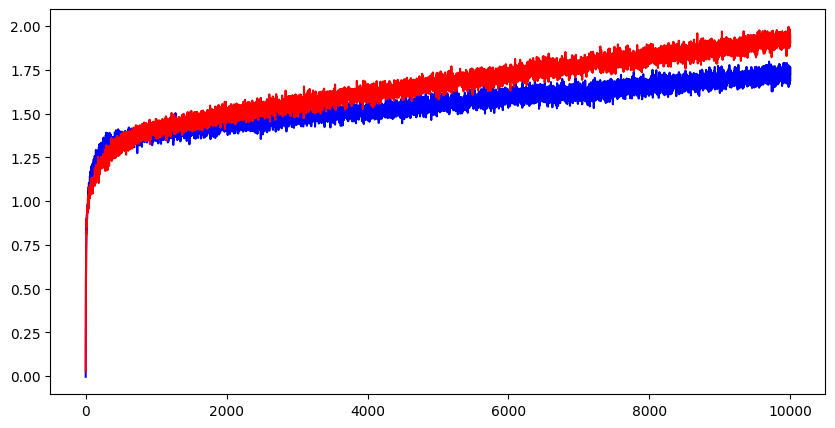

In [4]:
results = executor(time_steps=10000, epsilon=0.1, constant_step=False)
plt.plot(results, color="blue")

results = executor(time_steps=10000, epsilon=0.1, constant_step=True)
plt.plot(results, color="red")

plt.gcf().set_size_inches(10, 5)

### Exercise 2.11


In [2]:
## TODO